In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
%matplotlib inline
import warnings

from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# importing data from data source
mall = pd.read_csv('/content/drive/MyDrive/Mini_Project/DS3_C6_S3_MallCustomers_Data_Project.csv')
mall.head()     # showing first 5 rows of data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Structure of data
mall.shape

(200, 5)

In [ ]:
# Summarization of data
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# copy of data
df = mall.copy()

In [ ]:
# Replacing special charater to nan value if exists
special_char = ["!","@","#","$","^","&","*",",","-"," ?"]
df.replace(special_char, value=np.nan, inplace=True)

In [ ]:
# checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There is no missing valuo we can skip missing value treatment.

### Annual Income and speending score features.

In [ ]:
x = df.iloc[:,[3,4]].values
#print(x)

# Using k-means clustering.

### Finding optimum value

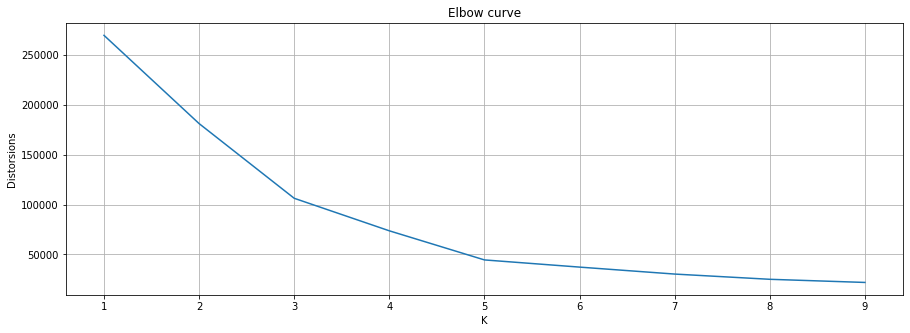

In [ ]:
# Find Optimal value of k(elbow method)
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

Optimum number of clusters = 5

In [ ]:
# Rebuilding the Model using K=5
Kmeans_model_5 = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = Kmeans_model_5.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing the clusters

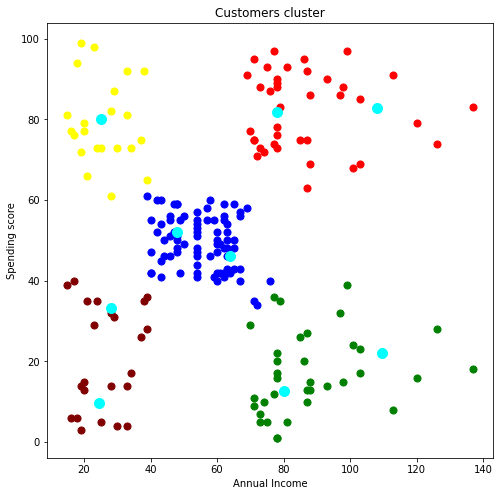

In [ ]:
# plottiing clusters of their centroid

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='blue', label='cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='red', label='cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='maroon', label='cluster 5')

# plotting centroid
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')
plt.title('Customers cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

Avove diagram shows 5 Clusters which implies spending scores and annual income.

# Using Hierarchical_Clustering

In [ ]:
X =df[['Annual Income (k$)', 'Spending Score (1-100)']].values

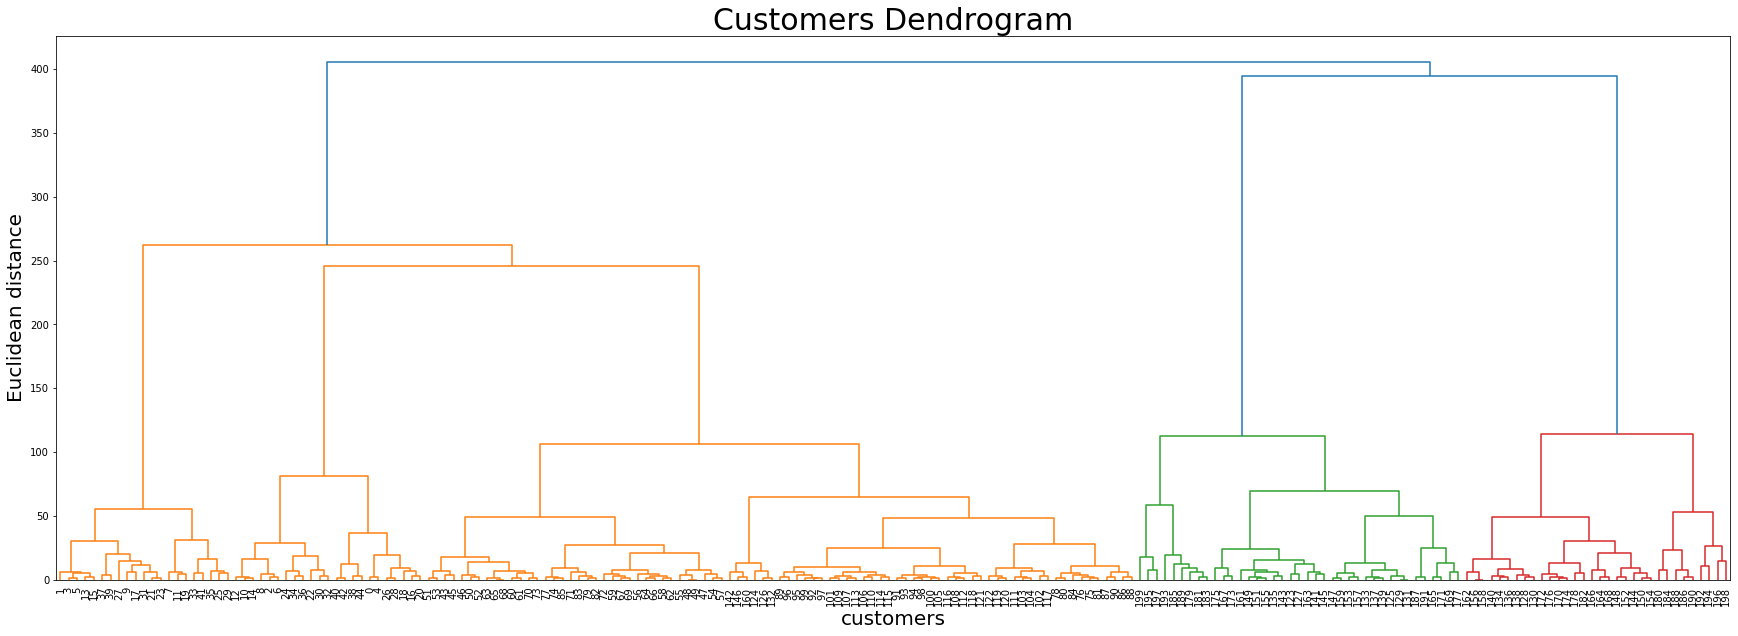

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customers Dendrogram',fontsize=30)
plt.xlabel('customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

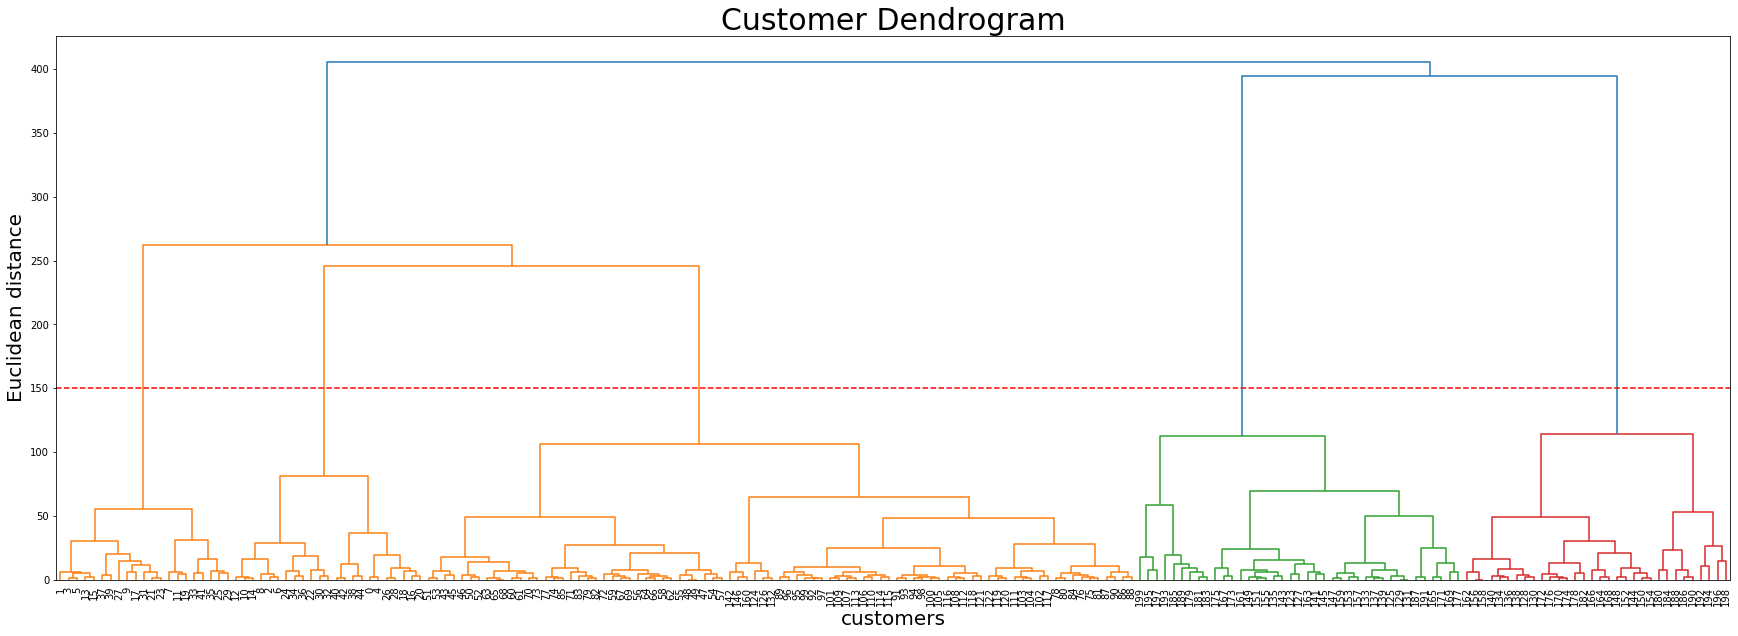

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

Threshold value = 150, cluster=5

In [ ]:
# model building
# ward
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# complete
hc1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc1 = hc1.fit_predict(X)

# average
hc2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc2 = hc2.fit_predict(X)

# single
hc3 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc3 = hc3.fit_predict(X)

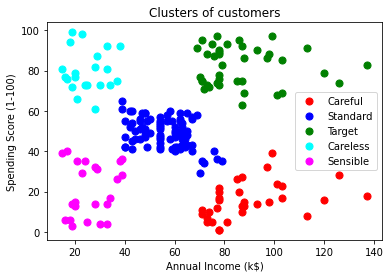

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

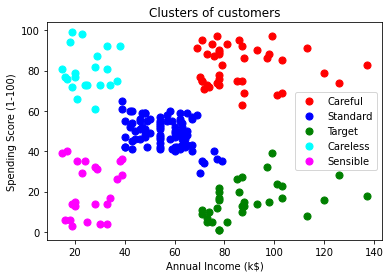

In [ ]:
# complete

plt.scatter(X[y_hc1 == 0, 0], X[y_hc1 == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc1 == 1, 0], X[y_hc1 == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc1 == 2, 0], X[y_hc1 == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc1 == 3, 0], X[y_hc1 == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc1 == 4, 0], X[y_hc1 == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

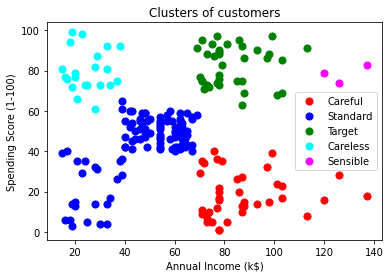

In [ ]:
# average

plt.scatter(X[y_hc2 == 0, 0], X[y_hc2 == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc2 == 1, 0], X[y_hc2 == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc2 == 2, 0], X[y_hc2 == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc2 == 3, 0], X[y_hc2 == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc2 == 4, 0], X[y_hc2 == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

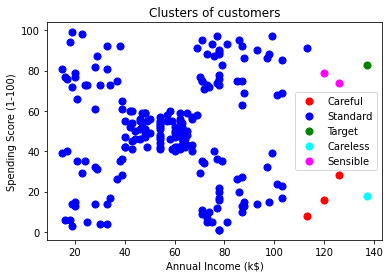

In [ ]:
# single

plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc3 == 3, 0], X[y_hc3 == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc3 == 4, 0], X[y_hc3 == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The above clustering showing distribution of customers with respect to their annual income to spending score.

# Using DBSCAN clustering

Applying the default DBSCAN algorithm to cluster the data without hyperparameter.

In [ ]:
dbscan=DBSCAN()
dbscan.fit(X)

DBSCAN()

In [ ]:
colors=['purple','red','blue','green']

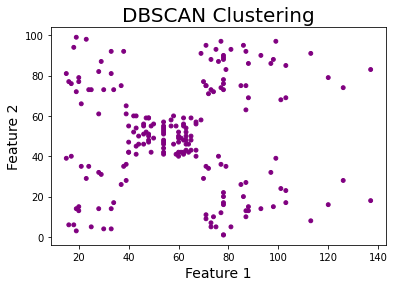

In [ ]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
#plt.figure(figsize=(10,10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Observation : DBSCAN without hyperparameter considering all datapoints as one cluster

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
#distances[:,1]

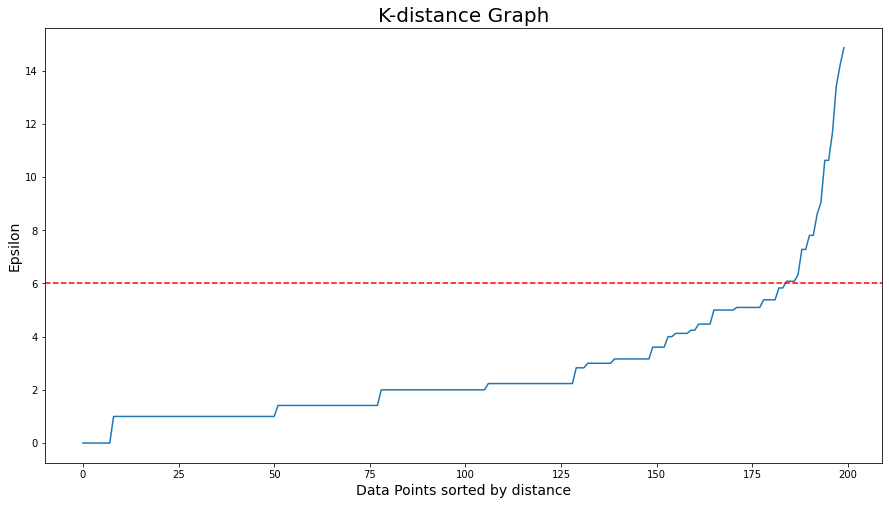

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=6
for min_samples in [6, 7, 8, 9, 10, 11, 12, 13, 14]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 6 | min_samples=  6 | obtained clustering:  [(1, 76), (2, 7), (3, 79), (4, 10), (5, 10), (6, 12), (7, 6)]
eps= 6 | min_samples=  7 | obtained clustering:  [(1, 89), (2, 79), (3, 12), (4, 10), (5, 10)]
eps= 6 | min_samples=  8 | obtained clustering:  [(1, 95), (2, 78), (3, 9), (4, 8), (5, 10)]
eps= 6 | min_samples=  9 | obtained clustering:  [(1, 113), (2, 78), (3, 9)]
eps= 6 | min_samples=  10 | obtained clustering:  [(1, 123), (2, 77)]
eps= 6 | min_samples=  11 | obtained clustering:  [(1, 124), (2, 76)]
eps= 6 | min_samples=  12 | obtained clustering:  [(1, 124), (2, 76)]
eps= 6 | min_samples=  13 | obtained clustering:  [(1, 127), (2, 73)]
eps= 6 | min_samples=  14 | obtained clustering:  [(1, 129), (2, 71)]


Applying the DBSCAN (with hyperparameters) algorithm to cluster the data

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=6,min_samples=8)
dbscan_opt.fit(X)

DBSCAN(eps=6, min_samples=8)

In [ ]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    95
 0    78
 3    10
 1     9
 2     8
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.096


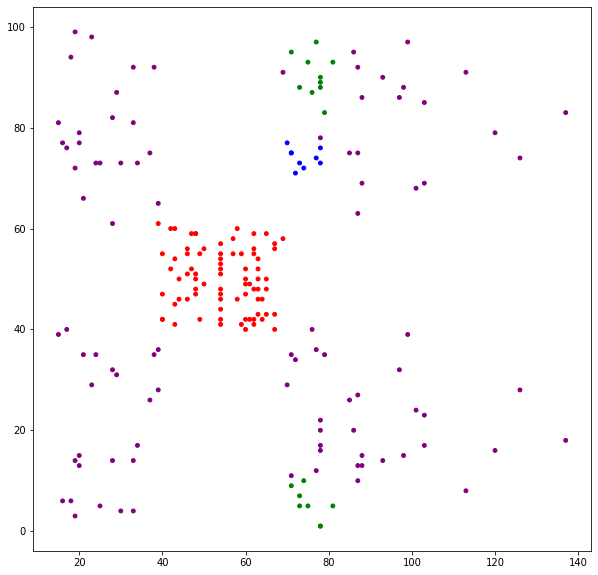

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, df['DBSCAN_opt_labels']))

From above three clustering method we found that K-Means clustering is the best model.